<a href="https://colab.research.google.com/github/Victor1992/nlp_tensorflow_disaster_detection/blob/main/introduction_to_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP in tensorflow

NLP has the goal of deriving information out of natural language( could be sequences text or speech)

Another common term for NLP is sequence to sequence problem (seq2seq).

## Check for GPU

In [1]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-52d1b947-0433-0f8c-a238-1e753c5b38db)


## Get helper functions


In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys


--2021-12-20 04:13:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-12-20 04:13:04 (38.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get text dataset

The dataset we are going to use is kaggle's dataset fro introduction to NLP dataset (text samples of Tweets labelled as disaster ot not disaster) : https://www.kaggle.com/c/nlp-getting-started


In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data('nlp_getting_started.zip')

--2021-12-20 04:13:11--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.157.128, 142.251.8.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.157.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.02s   

2021-12-20 04:13:11 (36.3 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualize a text dataset

In [4]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# Shuffle  training data
train_df_shuffled = train_df.sample(frac=1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
# How test data looks like ?
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
# how many total samples?
len(train_df), len(test_df)

(7613, 3263)

## Splitting data into training and testing dataset


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                             train_df_shuffled["target"].to_numpy(),
                                                                             test_size=0.1, # use 10% of data for random split
                                                                             random_state=42)

In [12]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [13]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Converting text into numbers

In [14]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default text vectorization parameters

text_vectorizer = TextVectorization(max_tokens=10000, # how many words are there in vocab
                  standardize="lower_and_strip_punctuation",
                  split="whitespace",
                  ngrams=None, # Creating group of n words
                  output_mode="int", # how to map tokens to numbers
                  output_sequence_length=15, # how long do u wnat ypur sequences to be
                  pad_to_max_tokens = True
                  )

In [15]:
# Fit the vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [16]:
sample_sentence = "There's a flood in my street!!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [17]:
# choose a random senetcnce form train sentences and tokenize it
import random
random_sentence = random.choice(train_sentences)
print(f"Original tweet:\n {random_sentence}\
        \n\n Vectorized version:")
text_vectorizer([random_sentence])

Original tweet:
 on the flip side I'm at Walmart and there is a bomb and everyone had to evacuate so stay tuned if I blow up or not        

 Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  11,    2, 5628,  668,   32,   17, 2614,    7,   74,    9,    3,
         108,    7,  238,   94]])>

In [18]:
# Get the unique words from vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all unique words
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in Vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")



Number of words in Vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating an embedding using embedding layer

An embedding is a rich numerical representation of words which can be learned during training

To make our embedding, we are going to use Tensotflow embedding layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters we care about most for our embedding layer:
* `input_dim` = the size of our vacabulary
* `output_dim` =  the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer

In [19]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = 10000,
                             output_dim = 128, # output shape
                             input_length = 15)
embedding

In [20]:
# Get a random sentence from atrainig set
random_sentence = random.choice(train_sentences)

print(f"Original text:\n {random_sentence}\
        \n\n Embedded Version:")

# Embed the random sentence (turn it into a dense vectors if fixed size)
embedding(text_vectorizer([random_sentence]))

Original text:
 @alextucker VOLCANO BOWL DRINK        

 Embedded Version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.000546  ,  0.00289758,  0.02294744, ..., -0.03299035,
          0.00537334, -0.02338012],
        [-0.03859464, -0.03598931,  0.03418341, ..., -0.04346321,
          0.04769968,  0.02185786],
        [-0.04000677,  0.04992897,  0.02599416, ...,  0.04060353,
         -0.02039346,  0.04514578],
        ...,
        [-0.0031541 , -0.04883819, -0.00298295, ...,  0.01276695,
          0.04148192,  0.0131173 ],
        [-0.0031541 , -0.04883819, -0.00298295, ...,  0.01276695,
          0.04148192,  0.0131173 ],
        [-0.0031541 , -0.04883819, -0.00298295, ...,  0.01276695,
          0.04148192,  0.0131173 ]]], dtype=float32)>

from sklearn import model_selection
## Modelling a test dataset( runnign a seroes of experiments)

Now as we have turned our text sequences inot numbers, it's time to start building a series of modelling experiements.

We'll start with a baseline and move on from there.

* Model 0 : Naive Bayes
* Model 1 : Feed forward neural network(dense model)
* Model 2 : LSTM Model (RNN)
* Model 3 : GRU Model (RNN)
* Model 4 : Bidirectional-LSTM model_selection
* Model 5 : 1D CNN
* Model 6 : tensorflow Hub Pretrained Feature Extractor(using transfer learning for NLP)

Standear Steps in modelling with tensorflow

* Create a  model
* Build a model
* Fit the model
* evaluate a model

### Model 0: Getting a baseline

As with all ML modelling experiments, it's importnant to craete a baseline model so ypu'he got a benchmark for future experiments to build upon.

To create our baseline, we'll use Sklearn Multinomial Naive Bayes using the TF_IDF formula to convert our words to numbers

**Note:** Its common practice to use non-DL algorithms as a baseline because of their speed and then later using DL to see we can improve upon

#### Create Baseline Model (Naive Bayes)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create Tokenization and modelling Pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # Convert words into numbers
                    ("clf", MultinomialNB()) # Model the text 
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

#### Evaluate the model

In [22]:
# evaluate the model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our Baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our Baseline model achieves an accuracy of: 79.27%


#### Make Predictions

In [23]:
# Make Predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

#### Let's evaluate on different Metrics

* Accuracy
* Precision
* Recall
* F1-Score

In [24]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuarcy, precision, recall and f1 score of a binar calssification model.
  """
  # calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall, and f1-score using "weighted avg"
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {
      "accuracy" : model_accuracy,
      "precision": model_precision,
      "model_recall" : model_recall,
      "f1": model_f1
  }
  return model_results

In [25]:
# Get Baseline results
baseline_results = calculate_results(y_true=val_labels, y_pred = baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'model_recall': 0.7926509186351706,
 'precision': 0.8111390004213173}

### Model 1. A simple dense layer 

In [26]:
# Create a tensorboard callback
from helper_functions import create_tensorboard_callback

# Create a directory to save Tensorboward logs
SAVE_DIR = "model_logs"

In [27]:
# build model with the functional api
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x =text_vectorizer(inputs)
x =embedding(x)
x= layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [28]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

#### Compile the Model

In [29]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#### Fit the Model

In [30]:
# Fit the model
model_1_history = model_1.fit(x= train_sentences,
                              y=train_labels,
                              epochs =5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20211220-041317
Epoch 1/5
215/215 [==============================] - 4s 8ms/step - loss: 0.6105 - accuracy: 0.6869 - val_loss: 0.5342 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.4428 - accuracy: 0.8209 - val_loss: 0.4765 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.3476 - accuracy: 0.8618 - val_loss: 0.4551 - val_accuracy: 0.7953
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2848 - accuracy: 0.8901 - val_loss: 0.4608 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2382 - accuracy: 0.9113 - val_loss: 0.4823 - val_accuracy: 0.7887


#### Evaluate the Model

In [31]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.7887


[0.4822540283203125, 0.7887139320373535]

#### Make Predictions

In [32]:
model_1_preds_probs = model_1.predict(val_sentences)
model_1_preds_probs[10]


array([0.11360867], dtype=float32)

In [33]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [34]:
# Convert model preictions probablities to label format
model_1_preds = tf.squeeze(tf.round(model_1_preds_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

#### Evalute the model

In [35]:
# Calculate model 1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 78.87139107611549,
 'f1': 0.7848945056280915,
 'model_recall': 0.7887139107611548,
 'precision': 0.7964015586347394}

In [36]:
import numpy as np
np.array(list(model_1_results.values()))  > np.array(list(baseline_results.values()))

array([False, False, False, False])

### Model 2: Recurrent neural network (RNN)

The premise of RNN is to use the representation of previous input to aid the representation of later input

LSTM: lomg short term memory

Structure of RNN will look like

```
Input(text) --> Tokenize --> Embedding --> LSTM(RNNs/ dense) --> Output(label Probablity)
```

**Resources**

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

http://karpathy.github.io/2015/05/21/rnn-effectiveness/



#### Create LSTM Model

In [37]:
from keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x =text_vectorizer(inputs)
x = embedding(x)
x =layers.LSTM(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


In [38]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

#### Compile the Model

In [39]:
model_2.compile(loss ="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


#### Fit the model

In [40]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs =5,
                              validation_data=(val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, "model_2_LSTM") ])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20211220-041329
Epoch 1/5
215/215 [==============================] - 7s 12ms/step - loss: 0.2236 - accuracy: 0.9178 - val_loss: 0.5950 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1552 - accuracy: 0.9409 - val_loss: 0.5691 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1286 - accuracy: 0.9517 - val_loss: 0.7200 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1049 - accuracy: 0.9588 - val_loss: 0.8781 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0837 - accuracy: 0.9673 - val_loss: 0.9219 - val_accuracy: 0.7651


#### Make Predcitions

In [41]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:5]

array([[2.5184436e-03],
       [6.7330521e-01],
       [9.9956220e-01],
       [3.1602003e-02],
       [9.5779350e-04]], dtype=float32)

In [42]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

#### Evaluate Model 2 

In [43]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 76.50918635170603,
 'f1': 0.7617069552360818,
 'model_recall': 0.7650918635170604,
 'precision': 0.7692389494014341}

In [44]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'model_recall': 0.7926509186351706,
 'precision': 0.8111390004213173}

In [45]:
np.array(list(model_2_results.values())) > np.array(list(model_2_results.values()))

array([False, False, False, False])

### Model 3: GRU

**Resourse**

https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be

#### Create GRU model

In [46]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x =embedding(x)
x =layers.GRU(64)(x)
# print(x.shape)
# x =layers.GRU(64, return_sequences =True)(x)
# print(x.shape)
# x =layers.LSTM(42, return_sequences= True)(x)
# print(x.shape)
# x =layers.GRU(99)(x)
# print(x.shape)
# x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [47]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

#### Compile the model


In [48]:
model_3.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"]) 

#### Fit the model

In [49]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs =5,
                              validation_data = (val_sentences, val_labels),
                              callbacks =[create_tensorboard_callback(SAVE_DIR, "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20211220-041353
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.1567 - accuracy: 0.9384 - val_loss: 0.7714 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0803 - accuracy: 0.9702 - val_loss: 0.8793 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0669 - accuracy: 0.9740 - val_loss: 0.8923 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0600 - accuracy: 0.9747 - val_loss: 1.0498 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0488 - accuracy: 0.9787 - val_loss: 1.5024 - val_accuracy: 0.7730


#### Make Predictions

In [50]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[3.0162142e-04],
       [5.9104633e-01],
       [9.9988830e-01],
       [3.0105939e-02],
       [5.6211386e-05],
       [9.9984658e-01],
       [9.1802561e-01],
       [9.9997544e-01],
       [9.9992049e-01],
       [9.9530494e-01]], dtype=float32)

In [51]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

#### Evaluate model 3


In [52]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred = model_3_preds)
model_3_results

{'accuracy': 77.29658792650919,
 'f1': 0.77144803030122,
 'model_recall': 0.7729658792650919,
 'precision': 0.77365375135567}

In [53]:
np.array(list(model_3_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

### Model 4 Bidirectional RNN

#### Create a Bidirectional RNN Model 

In [54]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional") 

In [55]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

#### Compile the model

In [56]:
model_4.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

#### Fit the model

In [57]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20211220-041417
Epoch 1/5
215/215 [==============================] - 8s 19ms/step - loss: 0.1075 - accuracy: 0.9651 - val_loss: 0.9922 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0516 - accuracy: 0.9765 - val_loss: 1.0730 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0492 - accuracy: 0.9780 - val_loss: 1.3392 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0434 - accuracy: 0.9794 - val_loss: 1.2117 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0406 - accuracy: 0.9801 - val_loss: 1.2606 - val_accuracy: 0.7730


#### Make Predictions

In [58]:
model_4_pred_probs = model_4.predict(val_sentences)

In [59]:
# Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

#### Calculate the results

In [60]:
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred = model_4_preds)
model_4_results

{'accuracy': 77.29658792650919,
 'f1': 0.7709704727215051,
 'model_recall': 0.7729658792650919,
 'precision': 0.7745161732477092}

### Model 5 Convolutional Neural Network for Text

Typical structure of a Conv1D model for sequences(text)

```
Inputs(text)--> Tokenization--> Embedding-->Layers(typically ConvD+ Pooling) -> ouputs (class probablities)
```

In [61]:
# Test our embedding , Conv1d and max pooling
from tensorflow.keras import layers

embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        strides=1,
                        activation="relu", # relu = id value is -ve it converst to 0, and if +ve it remains the same
                        padding="valid")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

#### Create the model

In [62]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [63]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20211220-041443
Epoch 1/5
215/215 [==============================] - 3s 9ms/step - loss: 0.1242 - accuracy: 0.9591 - val_loss: 0.8765 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0738 - accuracy: 0.9740 - val_loss: 1.0388 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0611 - accuracy: 0.9749 - val_loss: 1.1099 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0571 - accuracy: 0.9747 - val_loss: 1.1568 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0515 - accuracy: 0.9781 - val_loss: 1.2367 - val_accuracy: 0.7625


In [64]:
# Make predictions

model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:5
                   ]

array([[3.1618318e-01],
       [5.7574928e-01],
       [9.9982893e-01],
       [6.0594041e-02],
       [5.5279793e-07]], dtype=float32)

In [65]:
# Convert pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [66]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred = model_5_preds)
model_5_results

{'accuracy': 76.24671916010499,
 'f1': 0.7598225942829093,
 'model_recall': 0.7624671916010499,
 'precision': 0.7648032381971924}

### Model 6 : TensorFlow pretrained Sentence Encoder


In [67]:
sample_sentence

"There's a flood in my street!!"

In [68]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence])
embed_samples[0][:50]


<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.01157027,  0.02485909,  0.02878048, -0.01271501,  0.03971538,
        0.08827759,  0.02680984,  0.05589838, -0.01068731, -0.00597291,
        0.00639324, -0.01819521,  0.00030816,  0.09105889,  0.05874644,
       -0.03180627,  0.01512473, -0.05162929,  0.00991364, -0.06865344,
       -0.04209306,  0.0267898 ,  0.03011006,  0.00321069, -0.00337967,
       -0.04787356,  0.02266721, -0.00985926, -0.04063613, -0.01292091,
       -0.04666384,  0.05630301, -0.03949254,  0.00517687,  0.02495827,
       -0.07014438,  0.02871506,  0.04947681, -0.00633978, -0.08960193,
        0.02807119, -0.00808363, -0.01360601,  0.05998649, -0.10361786,
       -0.05195374,  0.00232955, -0.02332524, -0.03758103,  0.03327726],
      dtype=float32)>

In [69]:
embed_samples[0].shape

TensorShape([512])

In [70]:
# Create Keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [71]:
# Craete model using Sequential API
model_6 = tf.keras.Sequential([
                               sentence_encoder_layer,
                               layers.Dense(64,activation="relu"),
                               layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_6_USE")

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [72]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder")]
                              )

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20211220-041520
Epoch 1/5
215/215 [==============================] - 8s 22ms/step - loss: 0.5082 - accuracy: 0.7822 - val_loss: 0.4527 - val_accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4158 - accuracy: 0.8155 - val_loss: 0.4417 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.4018 - accuracy: 0.8192 - val_loss: 0.4327 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3928 - accuracy: 0.8269 - val_loss: 0.4350 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3857 - accuracy: 0.8304 - val_loss: 0.4283 - val_accuracy: 0.8176


In [73]:
model_6_pred_probs = model_6.predict(val_sentences)
model_5_pred_probs[:5]

array([[3.1618318e-01],
       [5.7574928e-01],
       [9.9982893e-01],
       [6.0594041e-02],
       [5.5279793e-07]], dtype=float32)

In [74]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [75]:
model_6_results = calculate_results(val_labels,model_6_preds)

In [76]:
model_6_results

{'accuracy': 81.75853018372703,
 'f1': 0.8161793631328899,
 'model_recall': 0.8175853018372703,
 'precision': 0.8196403099324437}

### Model 7: TF Hub pretrained USE but with 10% training data


In [77]:
# NOTE: Making data splits like below leads to data leakage (model7 trained on 10% data gives better results then modle 6 trained on 100% data)
# DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET

# Create subset fo 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# # train_10_percent.head(), len(train_10_percent)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)


In [78]:
train_10_percent_split = int(0.1* len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

685

In [79]:
# Check the number of each label in the upadted training data subset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [81]:
train_10_percent["target"].value_counts()

NameError: ignored

In [102]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

To recreate a model same as previous model we can use tf.keras.model.clone 

In [83]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [84]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20211220-042909
Epoch 1/5
22/22 [==============================] - 4s 57ms/step - loss: 0.6761 - accuracy: 0.6321 - val_loss: 0.6540 - val_accuracy: 0.7297
Epoch 2/5
22/22 [==============================] - 1s 47ms/step - loss: 0.6058 - accuracy: 0.8073 - val_loss: 0.5980 - val_accuracy: 0.7664
Epoch 3/5
22/22 [==============================] - 1s 33ms/step - loss: 0.5327 - accuracy: 0.8190 - val_loss: 0.5443 - val_accuracy: 0.7703
Epoch 4/5
22/22 [==============================] - 1s 33ms/step - loss: 0.4713 - accuracy: 0.8117 - val_loss: 0.5097 - val_accuracy: 0.7677
Epoch 5/5
22/22 [==============================] - 1s 47ms/step - loss: 0.4279 - accuracy: 0.8307 - val_loss: 0.4982 - val_accuracy: 0.7730


In [85]:
# MAke predictions
model_7_pred_probs = model_7.predict(val_sentences)

In [86]:
# Turn pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs)) 
model_7_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [87]:
model_7_results = calculate_results(val_labels,
                                    model_7_preds)
model_7_results

{'accuracy': 77.29658792650919,
 'f1': 0.7701512125975899,
 'model_recall': 0.7729658792650919,
 'precision': 0.7763206990944375}

In [88]:
model_6_results

{'accuracy': 81.75853018372703,
 'f1': 0.8161793631328899,
 'model_recall': 0.8175853018372703,
 'precision': 0.8196403099324437}

## Comparing the performances  of each of our models

In [89]:
all_model_results = pd.DataFrame({
    "0_baseline": baseline_results,
    "1_simple_dense": model_1_results,
    "2_lstm": model_2_results,
    "3_gru": model_3_results,
    "4_bidirectional": model_4_results,
    "5_conv1d":model_5_results,
    "6_tf_hub_use_encoder": model_6_results,
    "7_tf_hub_hub_use_encoder_10_percent": model_7_results
})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,model_recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.871391,0.796402,0.788714,0.784895
2_lstm,76.509186,0.769239,0.765092,0.761707
3_gru,77.296588,0.773654,0.772966,0.771448
4_bidirectional,77.296588,0.774516,0.772966,0.770970
5_conv1d,76.246719,0.764803,0.762467,0.759823
6_tf_hub_use_encoder,81.758530,0.819640,0.817585,0.816179
7_tf_hub_hub_use_encoder_10_percent,77.296588,0.776321,0.772966,0.770151


In [90]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,model_recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.788714,0.796402,0.788714,0.784895
2_lstm,0.765092,0.769239,0.765092,0.761707
3_gru,0.772966,0.773654,0.772966,0.771448
4_bidirectional,0.772966,0.774516,0.772966,0.770970
5_conv1d,0.762467,0.764803,0.762467,0.759823
6_tf_hub_use_encoder,0.817585,0.819640,0.817585,0.816179
7_tf_hub_hub_use_encoder_10_percent,0.772966,0.776321,0.772966,0.770151


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


### Visualize All model Results 

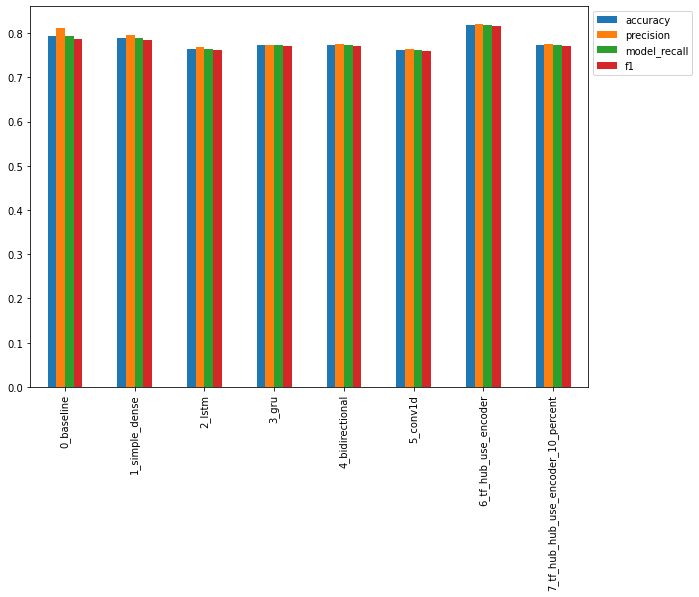

In [91]:

all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

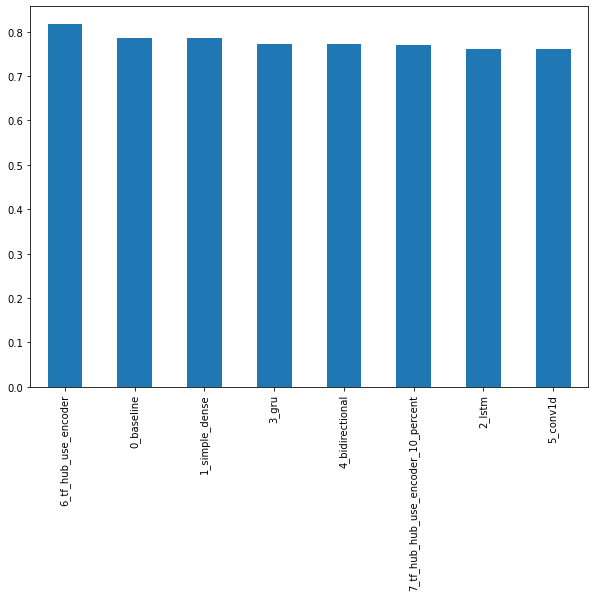

In [92]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7));

## Saving and Loading a trained model

There are two main formats to save a model to in Tensorflow:

1. The HDF5 format
2. The `SavedModel` format ( default when using tensorflow)

### HDF5 Format

In [93]:
# Save the Tf Hub instance encoder model to HDF5 format
model_6.save("model_6.h5")

In [94]:
# Load model with custom Hub Layer ( required HDF5 format)
loaded_model_6 =  tf.keras.models.load_model("model_6.h5", custom_objects={"KerasLayer": hub.KerasLayer})

In [95]:
# Hoe does loaded model perform
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 15ms/step - loss: 0.4283 - accuracy: 0.8176


[0.4282914102077484, 0.817585289478302]

In [96]:
model_6_results

{'accuracy': 81.75853018372703,
 'f1': 0.8161793631328899,
 'model_recall': 0.8175853018372703,
 'precision': 0.8196403099324437}

### SavedModel Format

In [97]:
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [98]:
# Load the model
loaded_model_6_SavedModel_format = tf.keras.models.load_model("model_6_SavedModel_format")

In [99]:
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 16ms/step - loss: 0.4283 - accuracy: 0.8176


[0.428291380405426, 0.817585289478302]

## Downloading the Models from google colab

In [ ]:
from google.colab import files
files.download('/content/model_6_SavedModel_format')


In [ ]:
files.download('/content/model_6.h5')